In [1]:
# import any necessary packages

import os
import pandas as pd
import numpy as np
# need to import the sktime utils
from sktime.forecasting.all import *
from sktime.forecasting.ets import AutoETS


%matplotlib inline

In [2]:
# check current working directory
print(os.getcwd())

C:\Users\Luis\Projects\MLH_Fellowship_Warmup_Hackathon\scrap_notebook


In [3]:
df = pd.read_csv(os.getcwd() + "/../data/sleepdata.csv")
df

,Start,End,Sleep quality,Time in bed,Wake up,Sleep Notes,Heart rate,Activity (steps)
0,2014-12-29 22:57:49,2014-12-30 07:30:13,100%,8:32,:),NaN,59.0,0
1,2014-12-30 21:17:50,2014-12-30 21:33:54,3%,0:16,:|,Stressful day,72.0,0
2,2014-12-30 22:42:49,2014-12-31 07:13:31,98%,8:30,:|,NaN,57.0,0
3,2014-12-31 22:31:01,2015-01-01 06:03:01,65%,7:32,NaN,NaN,NaN,0
4,2015-01-01 22:12:10,2015-01-02 04:56:35,72%,6:44,:),Drank coffee:Drank tea,68.0,0
...,...,...,...,...,...,...,...,...
882,2018-02-12 21:54:14,2018-02-13 07:02:15,91%,9:08,NaN,NaN,NaN,56
883,2018-02-13 23:49:19,2018-02-14 07:00:53,81%,7:11,NaN,NaN,NaN,64
884,2018-02-14 21:24:05,2018-02-15 06:20:52,71%,8:56,NaN,NaN,NaN,3316
885,2018-02-15 21:36:32,2018-02-16 06:50:31,80%,9:13,NaN,NaN,NaN,6555


In [4]:
# remove sleep notes, heart rate and activity, and for now, Wake up emoji
list(df)

['Start',
 'End',
 'Sleep quality',
 'Time in bed',
 'Wake up',
 'Sleep Notes',
 'Heart rate',
 'Activity (steps)']

In [5]:
df = df.drop('Heart rate', 1)
df = df.drop('Activity (steps)', 1)
df = df.drop('Sleep Notes', 1)
df = df.drop('Wake up', 1)
df = df.drop('End', 1)

In [6]:
df

,Start,Sleep quality,Time in bed
0,2014-12-29 22:57:49,100%,8:32
1,2014-12-30 21:17:50,3%,0:16
2,2014-12-30 22:42:49,98%,8:30
3,2014-12-31 22:31:01,65%,7:32
4,2015-01-01 22:12:10,72%,6:44
...,...,...,...
882,2018-02-12 21:54:14,91%,9:08
883,2018-02-13 23:49:19,81%,7:11
884,2018-02-14 21:24:05,71%,8:56
885,2018-02-15 21:36:32,80%,9:13


In [24]:
# chop sleep quality percentages to range between 0 and 10
def truncate_percentage_to_range(x):
    x = x.strip('%')
    x = int(x) / 10.0
    return x

def time_to_minutes(x):
    s = x.split(":")
    s = int(s[0]) * 60 + int(s[1])
    return s

def extract_date(x):
    s = x.split(" ")
    return s[0]

df['Sleep quality'] = df['Sleep quality'].apply(truncate_percentage_to_range)
df['Time in bed'] = df['Time in bed'].apply(time_to_minutes)
df['Start'] = df['Start'].apply(extract_date)
df = df.rename(columns={'Start':'Date'})

AttributeError: 'float' object has no attribute 'strip'

In [27]:
df

,Date,Sleep quality,Time in bed
0,2014-12-29,10.0,512
1,2014-12-30,0.3,16
2,2014-12-30,9.8,510
3,2014-12-31,6.5,452
4,2015-01-01,7.2,404
...,...,...,...
882,2018-02-12,9.1,548
883,2018-02-13,8.1,431
884,2018-02-14,7.1,536
885,2018-02-15,8.0,553


<AxesSubplot:xlabel='Date'>

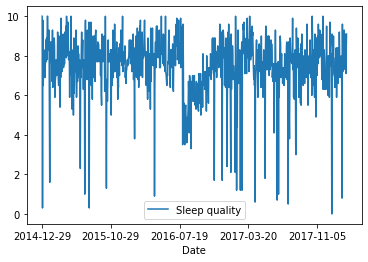

In [8]:
# Plot the data over the dates
# At first glance, we have 887 rows starting in 2014. 887 / 365 is approx 2.4 years,
# but technically this data set spans from the beginning of 2015 to the beginning of 2018,
# a time of over 3 years. There's definetly some gaps.
df.plot(x="Date", y = "Sleep quality")

In [9]:
user_df = pd.read_csv(os.getcwd() + "/../test/test_inputs/sample_7_days.csv")
user_df["Time in bed"] = 60 * user_df["Time in bed"]
user_df

,Date,Sleep quality,Time in bed
0,2021-01-29,7,420
1,2021-01-30,6,420
2,2021-01-31,7,360
3,2021-02-01,7,420
4,2021-02-02,6,420
5,2021-02-03,0,180
6,2021-02-04,8,540


In [10]:
# frames = [df, user_df]
# result = pd.concat(frames, ignore_index=True)
result = df.append(user_df)
result

,Date,Sleep quality,Time in bed
0,2014-12-29,10.0,512
1,2014-12-30,0.3,16
2,2014-12-30,9.8,510
3,2014-12-31,6.5,452
4,2015-01-01,7.2,404
...,...,...,...
2,2021-01-31,7.0,360
3,2021-02-01,7.0,420
4,2021-02-02,6.0,420
5,2021-02-03,0.0,180


In [11]:
list(result)

['Date', 'Sleep quality', 'Time in bed']

In [12]:
y = load_airline() # numpy array
y_train, y_test = temporal_train_test_split(y, test_size=36)
fh = ForecastingHorizon(y_test.index, is_relative=False)
forecaster = ThetaForecaster(sp=12)  # monthly seasonal periodicity
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
smape_loss(y_test, y_pred)

0.08661467801458492

108 36
y: Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
           ...  
1960-08    606.0
1960-09    508.0
1960-10    461.0
1960-11    390.0
1960-12    432.0
Freq: M, Name: Number of airline passengers, Length: 144, dtype: float64

y_train: Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
           ...  
1957-08    467.0
1957-09    404.0
1957-10    347.0
1957-11    305.0
1957-12    336.0
Freq: M, Name: Number of airline passengers, Length: 108, dtype: float64

y_test: Period
1958-01    340.0
1958-02    318.0
1958-03    362.0
1958-04    348.0
1958-05    363.0
1958-06    435.0
1958-07    491.0
1958-08    505.0
1958-09    404.0
1958-10    359.0
1958-11    310.0
1958-12    337.0
1959-01    360.0
1959-02    342.0
1959-03    406.0
1959-04    396.0
1959-05    420.0
1959-06    472.0
1959-07    548.0
1959-08    559.0
1959-09    463.0
1959-10    407.0
1959-11    362.0
1959-12    405.0
1960-01    417.0
1960-

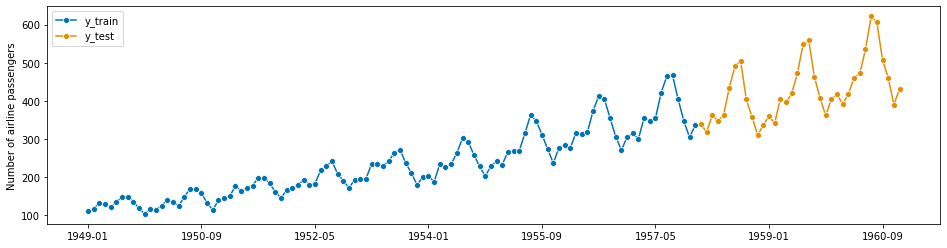

In [13]:
plot_series(y_train, y_test, labels=["y_train", "y_test"])
print(y_train.shape[0], y_test.shape[0])
print("y:", y)
print("\ny_train:", y_train)
print("\ny_test:", y_test)

In [14]:
# relative forecasting horizon
rfh = np.arange(len(y_test)) + 1

# absolute forecasting horizon
afh = ForecastingHorizon(y_test.index, is_relative=False)

print("rfh", rfh)
print("afh", afh)

rfh [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36]
afh ForecastingHorizon(['1958-01', '1958-02', '1958-03', '1958-04', '1958-05', '1958-06',
             '1958-07', '1958-08', '1958-09', '1958-10', '1958-11', '1958-12',
             '1959-01', '1959-02', '1959-03', '1959-04', '1959-05', '1959-06',
             '1959-07', '1959-08', '1959-09', '1959-10', '1959-11', '1959-12',
             '1960-01', '1960-02', '1960-03', '1960-04', '1960-05', '1960-06',
             '1960-07', '1960-08', '1960-09', '1960-10', '1960-11', '1960-12'],
            dtype='period[M]', name='Period', freq='M', is_relative=False)


naive:  0.2319577038795143
naive seasonal:  0.145427686270316
exponential smoothing, seasonal:  0.051444019094775015
auto ets:  0.013877550074177306
arima:  0.028263336170447264


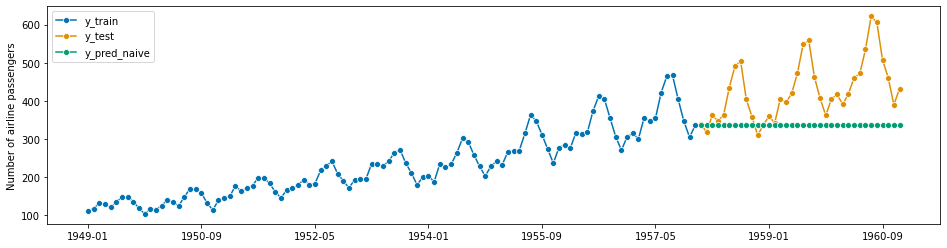

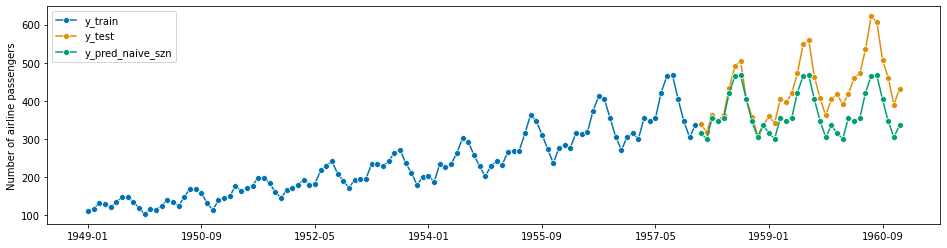

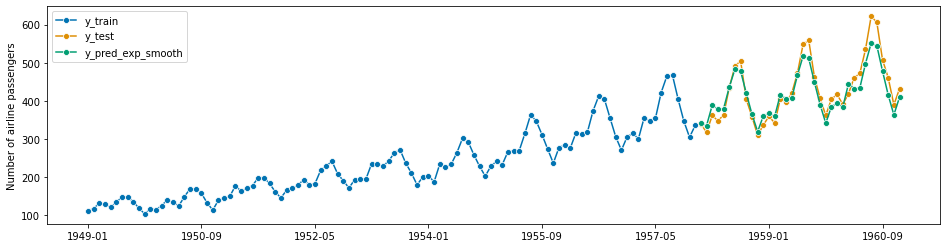

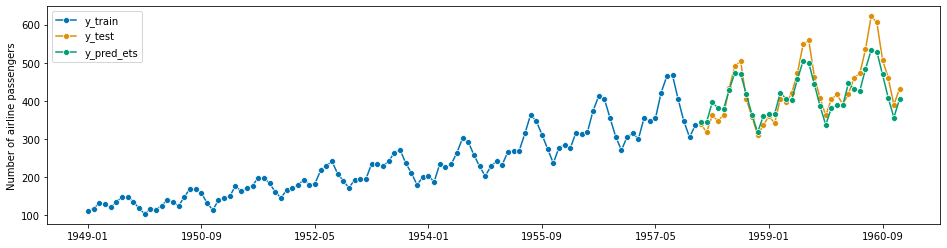

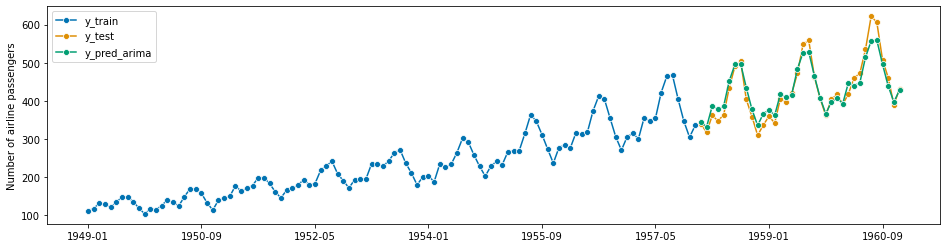

In [15]:


# actual forecasting pipeline: 
# we first need to specify or build a model, then fit it to the training data, 
# and finally call predict to generate the forecasts for the given forecasting horizon

## Predicting using the last value

# specify the model
forecast_naive = NaiveForecaster(strategy="last")
forecast_naive_seasonal = NaiveForecaster(strategy="last", sp=12)
forecast_exponential_smoothing = ExponentialSmoothing(trend="add", seasonal="multiplicative", sp=12)
forecast_auto_ets = AutoETS(auto=True, sp=12, n_jobs=-1)
forecast_arima = AutoARIMA(sp=12, suppress_warnings=True)

# fit it to the training data
forecast_naive.fit(y_train)
forecast_naive_seasonal.fit(y_train)
forecast_exponential_smoothing.fit(y_train)
forecast_auto_ets.fit(y_train)
forecast_arima.fit(y_train)

# generate a prediction
y_pred_naive = forecast_naive.predict(afh)
y_pred_naive_szn = forecast_naive_seasonal.predict(afh)
y_pred_exp_smooth = forecast_exponential_smoothing.predict(afh)
y_pred_ets = forecast_auto_ets.predict(afh)
y_pred_arima = forecast_arima.predict(afh)

# generate plots
plot_series(y_train, y_test, y_pred_naive, labels=["y_train", "y_test", "y_pred_naive"])
plot_series(y_train, y_test, y_pred_naive_szn, labels=["y_train", "y_test", "y_pred_naive_szn"])
plot_series(y_train, y_test, y_pred_exp_smooth, labels=["y_train", "y_test", "y_pred_exp_smooth"])
plot_series(y_train, y_test, y_pred_ets, labels=["y_train", "y_test", "y_pred_ets"])
plot_series(y_train, y_test, y_pred_arima, labels=["y_train", "y_test", "y_pred_arima"])

# return the error (lower smape_loss, the higher the accuracy)
print("naive: ", smape_loss(y_pred_naive, y_test))
print("naive seasonal: ", smape_loss(y_pred_naive_szn, y_test))
print("exponential smoothing, seasonal: ", smape_loss(y_pred_exp_smooth, y_test))
print("auto ets: ", smape_loss(y_pred_exp_smooth, y_pred_ets))
print("arima: ", smape_loss(y_pred_exp_smooth, y_pred_arima))


# Coverage of forecasting from the sktime tuts:
Reduction to regression works as follows: We first need to transform the data into the required tabular format. We can do this by cutting the training series into windows of a fixed length and stacking them on top of each other. Our target variable consists of the subsequent observation for each window.

```
feature_window[:5, :]:
array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13]])
       
target_window[:5]:
array([10, 11, 12, 13, 14])
```

So this seems to be that the order is recursive. And, we are predicting only one value.

# Ensemble
https://tostr.pl/blog/ensemble-learning-stacking-models-with-scikit-learn/

0.08661467801458492

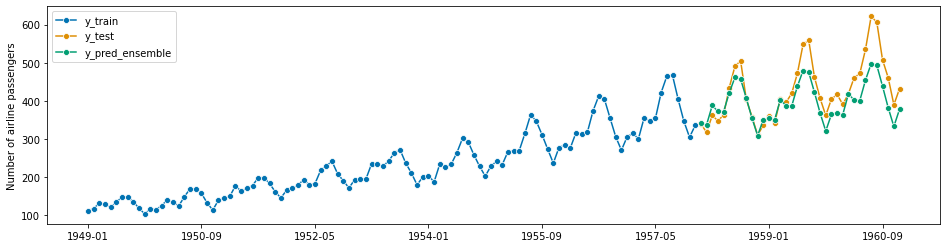

In [16]:
forecast_ensemble = EnsembleForecaster(
    [
        ("ses", ExponentialSmoothing(seasonal="multiplicative", sp=12)),
        (
            "holt",
            ExponentialSmoothing(
                trend="add", damped_trend=False, seasonal="multiplicative", sp=12
            ),
        ),
        (
            "damped",
            ExponentialSmoothing(
                trend="add", damped_trend=True, seasonal="multiplicative", sp=12
            ),
        ),
    ]
)
forecast_ensemble.fit(y_train)
y_pred_ensemble = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred_ensemble, labels=["y_train", "y_test", "y_pred_ensemble"])
smape_loss(y_test, y_pred_ensemble)

In [17]:
# Online forecasting imports
from sklearn.metrics import mean_squared_error

from sktime.forecasting.online_learning import (
    NormalHedgeEnsemble,
    OnlineEnsembleForecaster,
)

0.051641176508459785

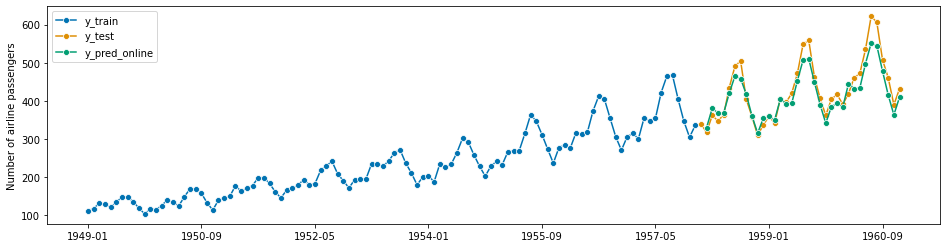

In [18]:
# First we need to initialize a PredictionWeightedEnsembler that will keep track of the loss accumulated by each forecaster and define which loss function we would like to use.
hedge_expert = NormalHedgeEnsemble(n_estimators=3, loss_func=mean_squared_error)
online_forecast = OnlineEnsembleForecaster(
    [
        ("ses", ExponentialSmoothing(seasonal="multiplicative", sp=12)),
        (
            "holt",
            ExponentialSmoothing(
                trend="add", damped_trend=False, seasonal="multiplicative", sp=12
            ),
        ),
        (
            "damped",
            ExponentialSmoothing(
                trend="add", damped_trend=True, seasonal="multiplicative", sp=12
            ),
        ),
    ],
    ensemble_algorithm=hedge_expert,
)
online_forecast.fit(y_train)
y_pred_online = online_forecast.update_predict(y_test)
plot_series(y_train, y_test, y_pred_online, labels=["y_train", "y_test", "y_pred_online"])
smape_loss(y_test[1:], y_pred_online)

In [30]:
df

,Date,Sleep quality,Time in bed
0,2014-12-29,10.0,512
1,2014-12-30,0.3,16
2,2014-12-30,9.8,510
3,2014-12-31,6.5,452
4,2015-01-01,7.2,404
...,...,...,...
882,2018-02-12,9.1,548
883,2018-02-13,8.1,431
884,2018-02-14,7.1,536
885,2018-02-15,8.0,553


In [52]:
df.iloc[:, 0:2]

,Date,Sleep quality
0,2014-12-29,10.0
1,2014-12-30,0.3
2,2014-12-30,9.8
3,2014-12-31,6.5
4,2015-01-01,7.2
...,...,...
882,2018-02-12,9.1
883,2018-02-13,8.1
884,2018-02-14,7.1
885,2018-02-15,8.0


In [51]:
df.iloc[:, 0:3:2]

,Date,Time in bed
0,2014-12-29,512
1,2014-12-30,16
2,2014-12-30,510
3,2014-12-31,452
4,2015-01-01,404
...,...,...
882,2018-02-12,548
883,2018-02-13,431
884,2018-02-14,536
885,2018-02-15,553


In [19]:
# attempt with our sleep data

## Predicting using the last value
# split the data into date, sleep quality and date, sleep time
df_quality = df.iloc[:,0:2]
df_quality.set_index('Date', inplace=True)
print(df_quality)

            Sleep quality
Date                     
2014-12-29           10.0
2014-12-30            0.3
2014-12-30            9.8
2014-12-31            6.5
2015-01-01            7.2
...                   ...
2018-02-12            9.1
2018-02-13            8.1
2018-02-14            7.1
2018-02-15            8.0
2018-02-16            9.1

[887 rows x 1 columns]


In [53]:
# clean up strictly non-positive values (lowest bound is 0.0, exclusive)
def raise_minimum(x):
    if x <= 0.0:
        return 0.1
    return x

df_quality['Sleep quality'] = df_quality['Sleep quality'].apply(raise_minimum)

# transform data to a compatible data type
print(type(y_train),type(df_quality),'\n')

df_quality.dropna(inplace=True)
s_quality = df_quality.squeeze()
s_quality.name = "Sleep quality from 0 to 10"
s_quality.index = pd.PeriodIndex(s_quality.index, freq="W", name="Period")

print('sleep quality\n',s_quality)
print(y_train)
print("minimum: ",df_quality.min())

<class 'pandas.core.series.Series'> <class 'pandas.core.frame.DataFrame'> 

sleep quality
 Period
2014-12-29/2015-01-04    10.0
2014-12-29/2015-01-04     0.3
2014-12-29/2015-01-04     9.8
2014-12-29/2015-01-04     6.5
2014-12-29/2015-01-04     7.2
                         ... 
2018-02-12/2018-02-18     9.1
2018-02-12/2018-02-18     8.1
2018-02-12/2018-02-18     7.1
2018-02-12/2018-02-18     8.0
2018-02-12/2018-02-18     9.1
Freq: W-SUN, Name: Sleep quality from 0 to 10, Length: 887, dtype: float64
Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
           ...  
1957-08    467.0
1957-09    404.0
1957-10    347.0
1957-11    305.0
1957-12    336.0
Freq: M, Name: Number of airline passengers, Length: 108, dtype: float64
minimum:  Sleep quality    0.1
dtype: float64


(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Sleep quality from 0 to 10'>)

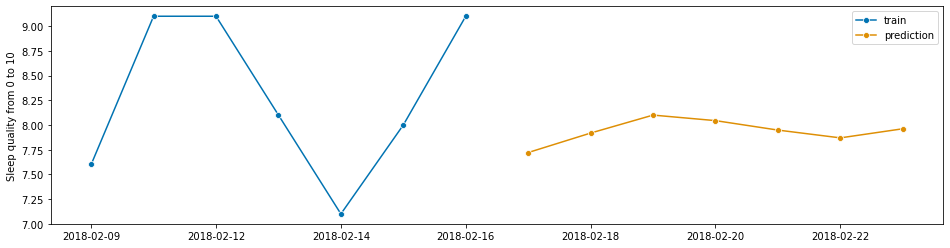

In [21]:
# generate a forecasting horizon
r_sleep_fh = np.arange(len(user_df)) + 1
# specify the model
forecast = ExponentialSmoothing(trend="add", seasonal="multiplicative", sp=7)

# # fit it to the training data
forecast.fit(s_quality)

# # generate a prediction
prediction = forecast.predict(r_sleep_fh)

# # generate plots
# todo - format s_user_quality
plot_series(s_quality[-7:], prediction, labels=["train", "prediction"])

# # return the error (lower smape_loss, the higher the accuracy)
# print("naive: ", smape_loss(y_pred_naive, y_test))

In [22]:
# convert prediction series to data frame
sleep_prediction_df = prediction.to_frame()
sleep_prediction_df = sleep_prediction_df.rename(columns={0:"Sleep Quality"})
print(list(sleep_prediction_df))
sleep_prediction_df

['Sleep Quality']


,Sleep Quality
2018-02-17,7.721011
2018-02-18,7.918112
2018-02-19,8.099896
2018-02-20,8.043899
2018-02-21,7.948165
2018-02-22,7.869369
2018-02-23,7.961466


In [23]:
sleep_prediction_df.to_csv("file1.csv")